In [1]:
## This code toggles all code cells displaying on or off, so we can see output and markdown cells only.
## All code cells display can be toggled on/off.

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
## Import all the things

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import pycountry

%matplotlib inline 

# This allows cells with long text values to wrap
pd.set_option('display.max_colwidth', -1)


In [3]:
# Setting up base maps 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # world map



# The Carpentries: Programmatic Assessment Report
## January 1, 2012 through March 31, 2018

#### Authors: Maneesha Sane, Erin Becker


**Do we need "about the Carpentries" boilerplate here? (including history of DC as a newer program)**

We began systematically recording data for our workshops in 2012. We used this data to investigate how have The Carpentries have grown over the years including number and geographic reach of our workshops, and learners at these workshops. We also look at our Instructor Training program, including number and geographic reach of instructor training events, number of trainees and their completion rates, and onboarding of new Instructor Trainers.  

Data are collected by a team of Workshop Administrators.  In Africa, Australia, Canada, New Zealand, and the United Kingdom, Workshop Adminstrators are affiliated with our member institutions and provide in-kind staff time.  A full-time Carpentries staff member is the Workshop Administrator for the rest the world.

In [4]:
# Load csv into df
workshops = pd.read_csv("data_files/workshops.csv")


# Translate country codes to country names
# This does not work for Namibia (country code NA)
def get_country_name(alpha_code):
    try:
        return pycountry.countries.get(alpha_2=alpha_code).name
    except KeyError:
        return "online"

workshops['country'] = workshops['country'].apply(get_country_name)


# Clean up the tag names
workshops.loc[workshops['tag_name'].str.contains("SWC"), "workshop_type"] = "SWC"
workshops.loc[workshops['tag_name'].str.contains("DC"), "workshop_type"] = "DC"
workshops.loc[workshops['tag_name'].str.contains("LC"), "workshop_type"] = "LC"
workshops.loc[workshops['tag_name'].str.contains("TTT"), "workshop_type"] = "TTT"

workshops = workshops.drop('tag_name', axis=1)

# Clean up attendance value - this is inconsistently stored as NaN or 0
# All zero values should be NaN
workshops['attendance'] =  workshops['attendance'].replace(0.0, np.nan)

# Remove online events like maintainer onboarding 
workshops = workshops.drop(workshops[workshops.country == "online"].index)

# Date data type
workshops['start_date'] = pd.to_datetime(workshops['start_date'])

# Remove instructor training events; these will be analyzed separately.

# Limit to non TTT workshops
workshops_nonTTT = workshops[workshops['workshop_type'] != "TTT"]

# workshops_nonTTT

## Part 1: Workshops


### The Carpentries

**Do we need "what is a workshop" boilerplate here?**

For each workshop, we collected the following data:


| variable | definition |
| -------- | ----------- | 
| slug | Unique identifier for each workshop. Takes the form `YYYY-MM-DD-sitename`. |
| start | Start date of the workshop. Takes the form `YYYY-MM-DD`. |
| attendance | Number of learners at the workshop. | 
| host_name | Institution that hosted the workshop. | 
| country | The two-letter country code for the country in which the workshop was held. |
| workshop_type | Whether this is a Software Carpentry (SWC) or Data Carpentry (DC) workshop. | 


The full data set, representing 1332 workshops, can be found in the Programmatic Assessment folder of The Carpentries Assessment repository on github (https://github.com/carpentries/assessment/tree/master/programmatic-assessment).




  

The number of Software Carpentry and Data Carpentry workshops appear to have remained roughly steady for the past several years, after a sharp jump from 2014 to 2015. The year 2015 was the first year in which The Carpentries had staff and a dedicated database to track workshop data, so some of this growth may instead reflect a growth in internal systems.

The data shown here may not account for unreported self-organized workshops. Although The Carpentries attempts to collect data on all workshops run under "The Carpentries" brand, sometimes institutions may run a workshop without reporting it back to The Carpentries staff. Thus, if there has been a shift from more centrally-organized to more self-organized workshops, this may cause an underestimate of our workshop growth. We are working to improve data collection to have more accurate reflections of our scope of work.

This may also reflect a shift to sites running a variation of Carpentries lessons, rather than official full Carpentries workshops.  While we've known anecdotally that this happens often, we have not systematically collected any data on when or how Carpentries lessons are used in other contexts.

**Figure (#): Workshops by Carpentry by Year**

This bar chart shows the number of Data Carpentry (DC) and Software Carpentry (SWC) workshops each year. Data for 2018 is a projection.  The proportion of workshops in the first quarter of 2017 relative to the full year was applied to actual first quarter data from 2018 to calcuate this projection. Source data can be found in the appendix.

In [5]:
# All workshops 2012 through 2017

workshops_by_carpentry_year_through_2017 = workshops_nonTTT[workshops_nonTTT['start_date'].dt.year<=2017]
workshops_by_carpentry_year_through_2017 = workshops_by_carpentry_year_through_2017.groupby([workshops_by_carpentry_year_through_2017['start_date'].dt.year, 'workshop_type'])['slug'].count().unstack()
workshops_by_carpentry_year_through_2017['total'] = workshops_by_carpentry_year_through_2017.sum(axis=1)


# All workshops in 2017 full year and 2017 Q1
workshops_by_carpentry_year_2017 = workshops_nonTTT[workshops_nonTTT['start_date'].dt.year == 2017]
workshops_by_carpentry_year_2017Q1 = workshops_by_carpentry_year_2017[workshops_by_carpentry_year_2017['start_date'].dt.month <= 3]                                              
workshops_by_carpentry_year_2017Q1 = workshops_by_carpentry_year_2017Q1.groupby([workshops_by_carpentry_year_2017Q1['start_date'].dt.year, 'workshop_type'])['slug'].count().unstack()
workshops_by_carpentry_year_2017 = workshops_by_carpentry_year_2017.groupby([workshops_by_carpentry_year_2017['start_date'].dt.year, 'workshop_type'])['slug'].count().unstack()

# All workshops in 2018 Q1
workshops_by_carpentry_year_2018Q1 = workshops_nonTTT[workshops_nonTTT['start_date'].dt.year == 2018]
workshops_by_carpentry_year_2018Q1 = workshops_by_carpentry_year_2018Q1.groupby([workshops_by_carpentry_year_2018Q1['start_date'].dt.year, 'workshop_type'])['slug'].count().unstack()

# Proportion of 2017 workshops that took place in 2017 Q1
proportion = workshops_by_carpentry_year_2017Q1/workshops_by_carpentry_year_2017
proportion = workshops_by_carpentry_year_2017Q1/workshops_by_carpentry_year_2017
proportion = proportion.rename(index={2017:2018})

# Use proportion to calculate 2018 projections
workshops_by_carpentry_year_2018Q1_projected = workshops_by_carpentry_year_2018Q1 / proportion
workshops_by_carpentry_year_2018Q1_projected = workshops_by_carpentry_year_2018Q1_projected.astype(int)
workshops_by_carpentry_year_2018Q1_projected['total'] = workshops_by_carpentry_year_2018Q1_projected.sum(axis=1)


# Combine real data through 2017 and projected 2018 data in to one dataframe
workshops_by_carpentry_year_with_projections = pd.concat([workshops_by_carpentry_year_through_2017, workshops_by_carpentry_year_2018Q1_projected], axis=0)

# Fill na with zeros and make floats in to ints
workshops_by_carpentry_year_with_projections = workshops_by_carpentry_year_with_projections.fillna(0)
workshops_by_carpentry_year_with_projections = workshops_by_carpentry_year_with_projections.astype(int)

# Rename 2018 to projected
# Do not need to do this; narrative note asserts these are projections
# workshops_by_carpentry_year_with_projections.rename(index={2018: '2018 projected'}, inplace=True)



workshops_by_carpentry_year_with_projections.columns.names = ["Workshop Type"]
workshops_by_carpentry_year_with_projections.index.names = ["Year"]

# workshops_by_carpentry_year_with_projections

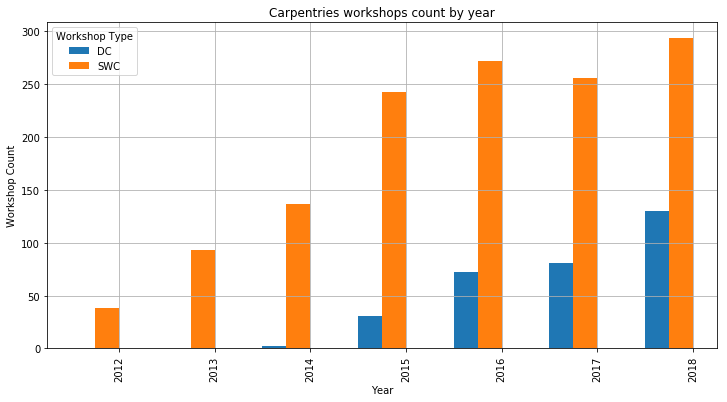

In [6]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .5
title = "Carpentries workshops count by year"
workshops_by_carpentry_year_with_projections.plot(y = ["DC", "SWC"], kind='bar', ax=ax, width=width, position=1, title=title)
ax.grid(True)

ax.set_xlabel("Year")
ax.set_ylabel("Workshop Count")

plt.show()

### Geographic reach 
* Narrative coming about how Carpentries began in predominantly white, English speaking countries, expanded to other European countries, expanded to Africa, Latin America. A list of all countries ever having hosted a Carpentries workshop can be found in the appendix. 


In many countries, we have seen a steady increase in the number of workshops run. In several countries though (Australia, New Zealand, Canada), we have seen a decline in the number of workshops run. This may be due to the reasons cited above, including unreported self-organized workshops or an increase in variations on Carpentries workshops.  In either case this is a motivation for The Carpentries to improve data collection and methods to understand our scope of work beyond our centrally coordinated workshops.

Decreases in the number of workshops run in some countries may also be accounted for by shifts in our instructor community.  Carpentries activity is sustained by our instructors. Some instructors may move to new geographies or to new career phases. Without a larger community in place, these geographies may not have had the capacity to sustain their activity.  This is a motivation for The Carpentries to build strong and sustainable communities, with systems that account for individual turnover.


In [7]:
workshops_by_country_year = workshops_nonTTT.groupby(['country', workshops_nonTTT['start_date'].dt.year])['slug'].count().unstack()
workshops_by_country_year = workshops_by_country_year.fillna(0)
workshops_by_country_year.rename(columns={2018: '2018Q1'}, inplace=True)
workshops_by_country_year['total'] = workshops_by_country_year.sum(axis=1)
workshops_by_country_year = workshops_by_country_year.astype(int)
# workshops_by_country_year

In [8]:
# Get all workshops for 2017
workshops_2017 = workshops_nonTTT[(workshops_nonTTT['start_date'].dt.year == 2017)]

# # Get all workshops for 2017 Q1
workshops_2017Q1 = workshops_nonTTT[(workshops_nonTTT['start_date'].dt.year == 2017) & (workshops_nonTTT['start_date'].dt.month <= 3)]

# # Get all workshops for 2018 Q1
workshops_2018Q1 = workshops_nonTTT[(workshops_nonTTT['start_date'].dt.year == 2018) & (workshops_nonTTT['start_date'].dt.month <= 3)]

# 2017 Q1 workshops by country
workshops_by_country_year_2017Q1 = workshops_2017Q1.groupby(['country', workshops_nonTTT['start_date'].dt.year])['slug'].count().unstack()
workshops_by_country_year_2017Q1.rename(columns={2017:'2017Q1'}, inplace=True)

# 2018 Q1 workshops by country
workshops_by_country_year_2018Q1 = workshops_2018Q1.groupby(['country', workshops_nonTTT['start_date'].dt.year])['slug'].count().unstack()
workshops_by_country_year_2018Q1.rename(columns={2018:'2018Q1'}, inplace=True)

# 2017 workshops by country
workshops_by_country_year_2017 = workshops_2017.groupby(['country', workshops_nonTTT['start_date'].dt.year])['slug'].count().unstack()

# Concatenated table, 2017 Q1 and 2018 Q1 workshops by country
workshops_by_country_year_1718Q1 = pd.concat([workshops_by_country_year_2017Q1, workshops_by_country_year_2018Q1, workshops_by_country_year_2017], axis=1)

# Add column to show what percent of 2017 workshops took place in 2017 Q1
workshops_by_country_year_1718Q1['prop2017Q1'] = workshops_by_country_year_1718Q1['2017Q1']/workshops_by_country_year_1718Q1[2017]

# Add column to show expected 2018 workshops, if rate is same as 2017
workshops_by_country_year_1718Q1['proj2018'] =  workshops_by_country_year_1718Q1['2018Q1']/workshops_by_country_year_1718Q1['prop2017Q1']

# Give df a better name
workshops_by_country_year_with_projections = workshops_by_country_year_1718Q1

# # Relying only on 2017 projections excludes countries that held a workshop in 2018 Q1 but not 2017 Q1
# # Adjust the 2018 projections to be the max of the 2018 projection or the 2018 Q1 actual
workshops_by_country_year_with_projections["adj_proj2018"] = workshops_by_country_year_with_projections[["proj2018", "2018Q1"]].max(axis=1)


# # Fill NA with 0 and cast floats as ints
workshops_by_country_year_with_projections = workshops_by_country_year_with_projections.fillna(0)
workshops_by_country_year_with_projections = workshops_by_country_year_with_projections.astype(int)


workshops_by_country_year_with_projections = workshops_by_country_year_with_projections.reset_index()
workshops_by_country_year_with_projections = workshops_by_country_year_with_projections.rename(columns={'index':'country'})

# Table used to calculate 2018 projections - uncomment next line to hide/show
# workshops_by_country_year_with_projections


In [9]:
# All countries that have held at least 10 workshops (lifetime)

workshops_by_country_year_many = workshops_by_country_year[workshops_by_country_year.total >= 10]
workshops_by_country_year_many = workshops_by_country_year_many.reset_index()

# Join table of countries with at least 10 workshops with 2018 projections

workshops_by_country_year_top = pd.merge(workshops_by_country_year_many, workshops_by_country_year_with_projections, on='country', how='left')
workshops_by_country_year_top = workshops_by_country_year_top[['country', 2012, 2013, 2014, 2015, 2016, '2017_x', 'adj_proj2018']]
workshops_by_country_year_top = workshops_by_country_year_top.rename(columns={'2017_x':2017, 'adj_proj2018':2018})

workshops_by_country_year_top = workshops_by_country_year_top.fillna(0)
workshops_by_country_year_top[2018] = workshops_by_country_year_top[2018].astype(int)
# workshops_by_country_year_top


### Figure (#): Countries hosting 10 or more workshops
caption......  see appendix for table....

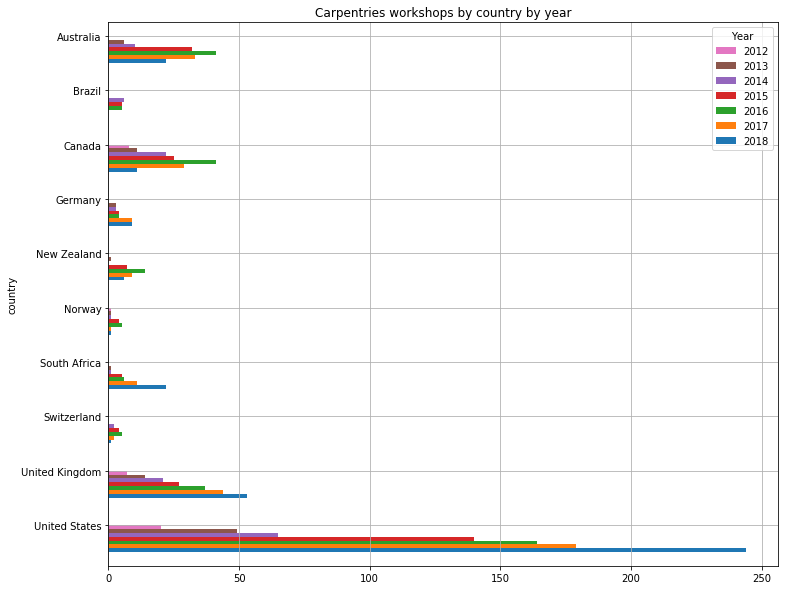

In [10]:
# Draw bar chart showing most active countries and workshops by year# Draw b 

workshops_by_country_year_top = workshops_by_country_year_top[::-1]
workshops_by_country_year_top = workshops_by_country_year_top.set_index('country')

fig = plt.figure(figsize=(12, 10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

title = "Carpentries workshops by country by year"
workshops_by_country_year_top.plot(y = list(workshops_by_country_year_top)[::-1], kind='barh', ax=ax, position=1, title=title)

ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Year', loc='upper right')

plt.show()

# workshops_by_country_year_top

### FIgure (#): Countries hosting first workshop each year
Narrative (bullets to be expanded)
* Darkest color is most recent; lightest color is oldest
* Note origins in US, Canada, Australia, Western Europe.  Shift to Africa, Latin America
* Motivating question - are countries sustaining workshops?  Include table/chart about how many years each country has continued to host workshops / how many are one and done.

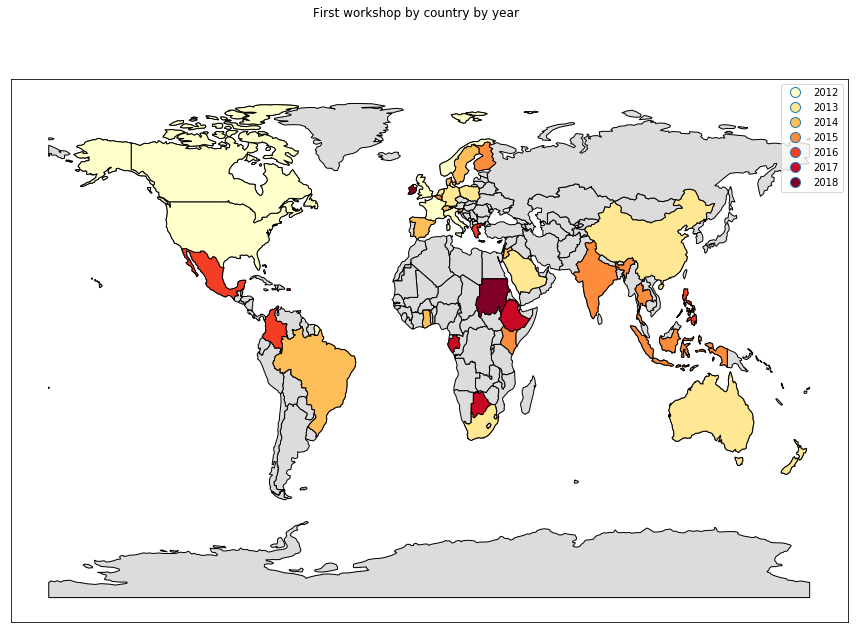

In [82]:


# When did each country have its first workshop?

w2 = workshops_by_country_year.copy()

# See https://stackoverflow.com/questions/31828240/first-non-null-value-per-row-from-a-list-of-pandas-columns
# and
# https://stackoverflow.com/questions/38467749/find-first-non-zero-value-in-each-row-of-pandas-dataframe

# Fill zero values with Nan to make them non valid values
res = w2[w2 != 0.0]
first_workshop = res.apply(pd.Series.first_valid_index, axis=1)

# Create a new data frame with columns for year and country
first_workshop = pd.DataFrame({'year': first_workshop.values.astype(str), 'country': first_workshop.index.values}, index=None)

# Sort this by year
first_workshop.sort_values(by='year', inplace=True)

# Change "2018Q1" to 2018
first_workshop.replace('2018Q1', 2018, inplace=True)

# Make all values ints
first_workshop.year = first_workshop.year.astype(int)
# first_workshop

# Make country a column, not index
# first_workshop.reset_index(inplace=True)


# Rename column "country" to "name" to be able to merge with geodata
first_workshop.rename(columns={'country':'name'}, inplace=True)

# Merge first_workshop df and geodata df to a df used for map
first_wkshp_map = pd.merge(world, first_workshop, on='name', how='left')

# Create map canvas
fig, ax = plt.subplots(figsize=(15,10))


# Fill NAs with Zero so map can read
first_wkshp_map.fillna(0, inplace=True)

# Drop the zero values so they are not in the legend or color scale
first_wkshp_map = first_wkshp_map[(first_wkshp_map.year != 0)]

fig.suptitle('First workshop by country by year')

# Years as ints, not floats
first_wkshp_map['year'] = first_wkshp_map['year'] .astype(int) 

# Plot basemap all in gray
world.plot(ax=ax, color='#DCDCDC', edgecolor='black')


# Overlay plot of countries in color scale
first_wkshp_map.plot(ax=ax, column='year', categorical=True, legend=True, cmap="YlOrRd", edgecolor = 'black')

# Drop x & y axis ticks
plt.xticks([], [])
plt.yticks([], [])


plt.show()



### Unique countries hosting a workshop each year

Narrative - how many unique countries we held workshops in each year. 

In [12]:
unique_countries_by_year = pd.DataFrame(columns=['year', 'count', 'countries'])

# There is probably a more efficient way to do this
for i in workshops_by_country_year.columns.tolist():
#     print(i)
    countries_that_year = workshops_by_country_year.index[workshops_by_country_year[i] >=1].tolist()
    country_count_by_year = len(countries_that_year)
    cty = ", ".join(countries_that_year)
#     print(cty)
    unique_countries_by_year = unique_countries_by_year.append({'year':i, 'count':country_count_by_year, 'countries':cty}, ignore_index=True)

unique_countries_by_year.replace('2018Q1', 2018, inplace=True)
unique_countries_by_year['count'] = unique_countries_by_year['count'].astype(int)
# unique_countries_by_year


### Figure (#) Number of unique countries hosting a workshop each year

(insert caption here)

How do we visually represent the total? (from here, need to cast floats as ints for year)

Note table is in appendix

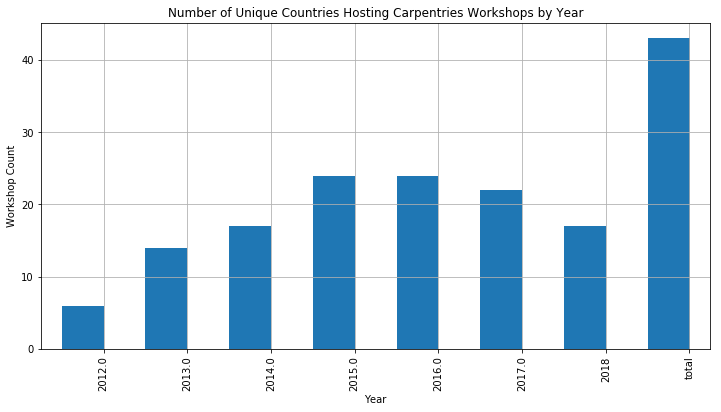

In [13]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .5
title = "Number of Unique Countries Hosting Carpentries Workshops by Year"

unique_countries_by_year.plot(y = ['count'], x="year", kind='bar', ax=ax, width=width, position=1, title=title, legend=False)

ax.grid(True)

ax.set_xlabel("Year")
ax.set_ylabel("Workshop Count")

plt.show()

### Workshop Attendance (rename?)

* Intro narrative: In addition to looking at how many workshops we’ve run we look at how many people we’ve impacted.
* Refer to workshops data in gh repo (same as workshops above

### Figure (#) Total attendance by Carpentry by year
Similar captioning as above, table in appendix.  2018 needs to be projection

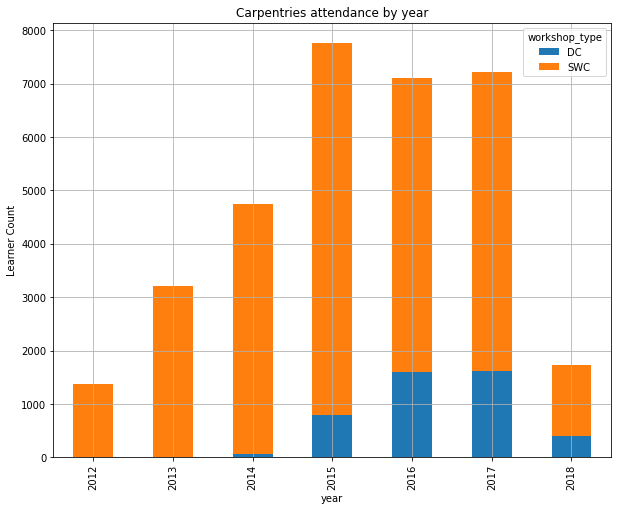

In [14]:

# Calculate projected attendance for 2018

# Total attendance for 2017
total2017 = workshops_2017['attendance'].sum(skipna=True)

# Total attendance for 2017 Q1
total2017Q1 = workshops_2017Q1['attendance'].sum(skipna=True)


# Total attendance for 2018 Q1
total2018Q1 = workshops_2018Q1['attendance'].sum(skipna=True)


proportion_attendance_2017Q1 = total2017Q1/total2017

projected_attendance_2018 = total2018Q1/proportion_attendance_2017Q1



attendance = workshops_nonTTT[['start_date', 'attendance', 'workshop_type']]   #df['date'].dt.year
attendance = attendance.assign(year=attendance['start_date'].dt.year)

# Doing the above like this gives a SettingWithCopyWarning error
# attendance['year'] = attendance['start_date'].dt.year
# See https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
total_attendance_by_year = attendance.groupby([ 'year', 'workshop_type'])['attendance'].sum().unstack()


total_attendance_by_year.fillna(0, inplace=True)
total_attendance_by_year = total_attendance_by_year.astype(int)


fig = plt.figure(figsize=(10, 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

title = "Carpentries attendance by year"
total_attendance_by_year.plot( kind='bar', ax=ax, title=title, legend=True, stacked=True)

ax.grid(True)

ax.set_ylabel("Learner Count")


plt.show()


### Class size

* Narrative about class size - trend towards smaller class sizes, fewer outliers.  Trend is user driven, not enforced by Carpentries, shows focus from hosts and instructors.  Long narrative. Refer to 5 number summary in appendix.

### Figure (#): Class size by year.  
Box plot.  Same captioning, also include how to read box plot. Note 2018 is acutal, not projected data.



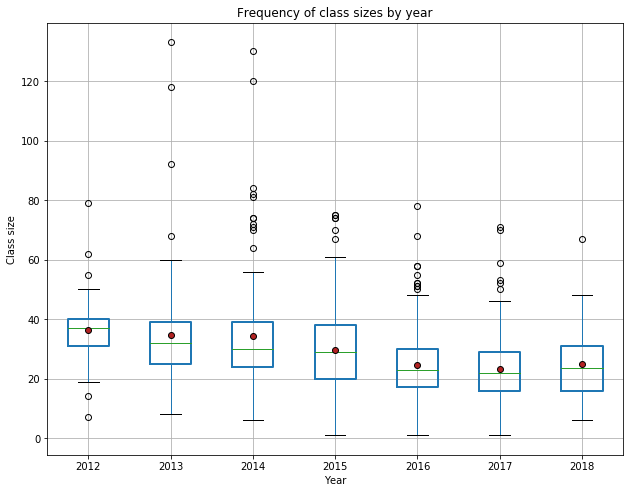

In [15]:
# See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html

title = "Frequency of class sizes by year"

has_attendance = attendance[pd.notnull(attendance['attendance'])]

meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='firebrick')
boxprops = dict(linestyle='-', linewidth=2, color='k')

ax = has_attendance.boxplot(by="year", figsize=(10,8), showmeans = True, meanprops = meanprops, boxprops = boxprops)
ax.set_title(title)
ax.get_figure().suptitle("")
ax.set_xlabel("Year")
ax.set_ylabel("Class size")
plt.show()

## Part 2: Instructor Training


### Overview 

(intro paragraph to be added)

The analyses below exclude data from 2018 Q1.  Trainees have 90 days to complete their certification requirements, so no one who attended instructor training in 2018 Q1 would be expected to have completed certification.

For each of our instructor training events, we collected the following data:

| variable | definition |
| -------- | ----------- | 
| slug | Unique identifier for each workshop. Takes the form `YYYY-MM-DD-sitename`. |
| start | Start date of the workshop. Takes the form `YYYY-MM-DD`. |
| country | The country in which the workshop was held. Online events are noted as "online" even if all participants were in one country. |
| attendance | Number of trainees at the workshop. | 
| count_badged | Number of trainees awarded a Software Carpentry (SWC) or Data Carpentry (DC) badge. * |
| pct_completion | Percent of trainees awarded a Software Carpentry (SWC) or Data Carpentry (DC) badge. * |

\* While we grant both Software Carpentry and Data Carpentry badges we do not distinguish between them for teaching eligibility or any other status within the Carpentries.


Countries include Australia	Canada	Netherlands	New Zealand	Norway	Poland	Puerto Rico	South Africa	SwitzerlandUnited Kingdom	United States


* Geographic reach
    * Note countries we've reached through training, note Puerto Rico is separated out to highlight our reach there
    * Format/content will follow the geographic reach of workshops
    * Countries where we actually have trainers (see next section)
    * Note why 2018 is not included  - they are not yet expected to be badged

* Completion Rates
    * Figure (#): Box plot of completion rates
    * 

    * 



### Figure (#): Online and  and inperson events

Caption - shows count of inperson and online training events.  Need to include 2018.  Source data is in appendix.

In [16]:
badges_by_training_event = pd.read_csv("data_files/badges_by_training_event.csv")



badges_by_training_event['pct_completion'] = badges_by_training_event['count_badged'] / badges_by_training_event['attendance'] * 100
badges_by_training_event = badges_by_training_event.round({'pct_completion':1})
badges_by_training_event['start'] = pd.to_datetime(badges_by_training_event['start'])

badges_by_training_event_thru2017 = badges_by_training_event[badges_by_training_event['start'].dt.year < 2018]


badges_by_training_event['country'] = badges_by_training_event['country'].apply(get_country_name)

badges_by_training_event['start'] = pd.to_datetime(badges_by_training_event['start'])


badges_by_training_event_thru2017 = badges_by_training_event[badges_by_training_event['start'].dt.year < 2018]

# badges_by_training_event


In [17]:
trainings_by_country = badges_by_training_event_thru2017.groupby([badges_by_training_event['start'].dt.year, 'country'])['slug'].count().unstack()
trainings_by_country['total'] = trainings_by_country.sum(axis=1)
trainings_by_country.index.values
trainings_by_country = trainings_by_country.rename(index = {2018:'2018Q1'})
trainings_by_country = trainings_by_country.fillna(0)
trainings_by_country = trainings_by_country.astype(int)

# trainings_by_country

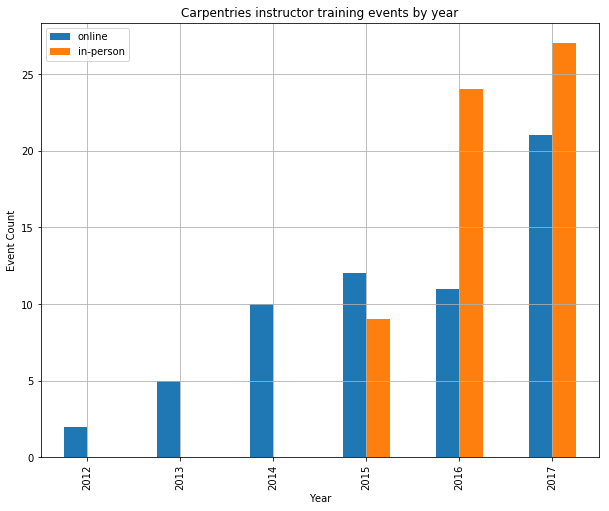

In [18]:
countries = list(trainings_by_country)
countries.remove('online')
countries.remove('total')
inperson_trainings = trainings_by_country[countries].sum(axis = 1).to_frame()

online_trainings = trainings_by_country[['online']]

trainings_online_inperson = pd.concat([inperson_trainings, online_trainings], axis=1)

trainings_online_inperson.rename(columns = {0:'in-person'}, inplace=True)

trainings_online_inperson.fillna(0, inplace=True)
trainings_online_inperson = trainings_online_inperson.astype(int)

# trainings_online_inperson

fig = plt.figure(figsize=(10, 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

title = "Carpentries instructor training events by year"
ax = trainings_online_inperson[['online', 'in-person']].plot(kind='bar', ax=ax, stacked=False, title=title)
ax.grid(True)

ax.set_ylabel("Event Count")
ax.set_xlabel("Year")


plt.show()





### Figure (#): Completion rates by year
### Is this a useful visualization?? Is boxplot or scatter plot a more useful visualization?


Caption explaining box or scatter plot goes here. Scatterplot needs legend - orange is online, blue is in person.  Circle size represents class size.

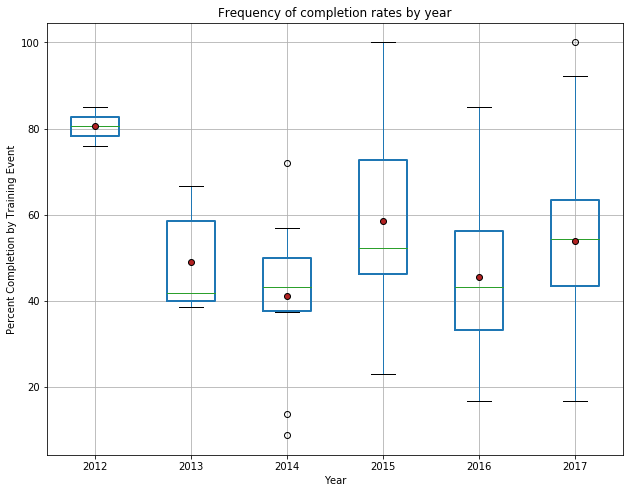

In [19]:
# See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html

title = "Frequency of completion rates by year"

bbp = badges_by_training_event_thru2017[['start', 'pct_completion']]
bbp = bbp.assign(year=bbp['start'].dt.year)
badges_by_training_event_thru2017 = badges_by_training_event_thru2017.assign(year=badges_by_training_event_thru2017['start'].dt.year)


ax = badges_by_training_event_thru2017.boxplot(by="year", column='pct_completion', figsize=(10,8), showmeans = True, meanprops = meanprops, boxprops = boxprops)
ax.set_title(title)
ax.get_figure().suptitle("")
ax.set_xlabel("Year")
ax.set_ylabel("Percent Completion by Training Event")
plt.show()

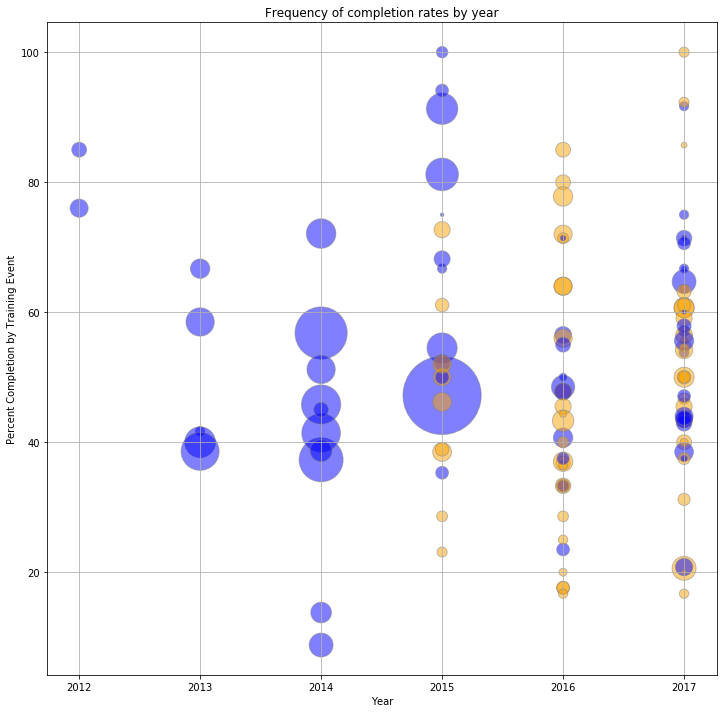

In [20]:
fig = plt.figure(figsize=(12, 12)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

# Set colors to distinguish online/inperson events
x = list(badges_by_training_event_thru2017.country.unique())
color_dict = {}
for i in x:
    color_dict[i] = 'orange'
color_dict['online'] = 'blue'

col = badges_by_training_event_thru2017['country'].map(color_dict)

# set dot size - multiple of attendance
dotsize = badges_by_training_event_thru2017['attendance'] ** 1.8

title = "Frequency of completion rates by year"
badges_by_training_event_thru2017.plot( x='year', y = 'pct_completion', 
                                       kind='scatter', ax=ax, title=title, 
                                       c=col, edgecolors = 'gray', s= dotsize, alpha = 0.5, 
                                       legend=True
                                       )
ax.grid(True)

ax.set_xlabel("Year")
ax.set_ylabel("Percent Completion by Training Event")

plt.show()


### Teaching rates - section coming soon

* Teaching Rates
    * Figure (#): Box plot - how long to teach 1st workshop. Remove bins.
    * Narrative - shortest number of days to teach, earliest teaching before badge, longest time to teach first workshop.  % of instructors who taught before badge.  Number of instructors who teach before certified is increasing. What this means.
    * Table (#): 5 number summary

We continued to look at progress from going through instructor training to completing certification and getting badged on to when instructors taught their first workshop.  All dates are expressed as the first of the month. Exact dates are masked to preserve anonymity.

For each certified instructor, we collected the following data:

| variable | definition |
| -------- | ----------- | 
| date_awarded | The first day of the month the badge was awarded.  |
| first_wkshp | The first day of the month this instructor taught their first workshop. |
| days | A calculated field representing the difference between these two dates. |

The Carpentries requires that all centrally organized workshops are taught by certified Carpentries instructors. However, self organized workshops may be taught by one certified instructor who works with a peer or colleague as a co-instructors.  Many of these people go on to complete our instructor training program and become certified instructors themselves, which is why we see some people teaching even years before their certification date.

(Include note that raw data can be found in gh repo. n=942)

In [21]:
days_badge_to_teach = pd.read_csv("data_files/days_badge_to_teach.csv")


days_badge_to_teach['date_awarded'] = pd.to_datetime(days_badge_to_teach['date_awarded'])
days_badge_to_teach['first_wkshp'] = pd.to_datetime(days_badge_to_teach['first_wkshp'])
days_badge_to_teach['badge_year'] = days_badge_to_teach['date_awarded'].dt.year

days_badge_to_teach = days_badge_to_teach[days_badge_to_teach['badge_year'] < 2018]

# days_badge_to_teach

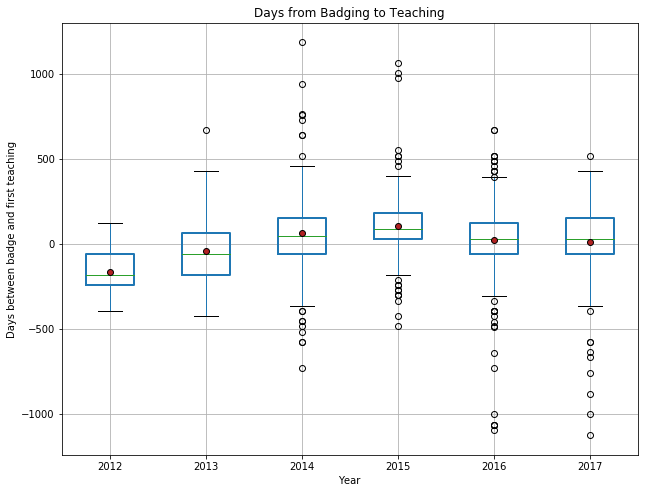

In [22]:
# See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html

title = "Days from Badging to Teaching"

ax = days_badge_to_teach.boxplot(by="badge_year", column='days', figsize=(10,8), showmeans = True, meanprops = meanprops, boxprops = boxprops)

ax.set_title(title)
ax.get_figure().suptitle("")
ax.set_xlabel("Year")
ax.set_ylabel("Days between badge and first teaching")
plt.show()

## Part 3: Trainers

### Instructor trainers

Until 2016, all Instructor Training events were run by Software Carpentry founder and former Executive Director Greg Wilson. This limited our growth...

In 2016, The Carpentries launched a training program for instructor trainers.
(narrative to be developed - bullets below)

* Allowed us to expand reach by running several events a month, across timezones for online events
* Allowed us to build capacity at member organizations who have onsite Instructor Trainers, run events for their site building a community of instructors there, these instructors also have onsite support to run workshops
* Trainers in African and European countries overlap timezones allowing them to connect with a wider audience
* Allowed us to reach new geographies - new group of Trainers in Africa
* Connect this back to increase in number of training events and new instructors
* Another Trainers training event is being planned for late 2018; anticipate same growth rate as 2017.

### Figures

* Figure (#): Badged trainers by year.  Note 2018 is actual, not projected & plans to run another training event
* Figure (#): Badged trainers by country. 
* Figure (#): Map if possible
* 





In [46]:
trainers = pd.read_csv("data_files/trainers.csv")
trainers['awarded'] = pd.to_datetime(trainers['awarded'])
trainers['country'] = trainers['country'].apply(get_country_name)

# Backwards way of fixing the NA/Namibia issue
trainers.replace('online', 'Namibia', inplace = True)
trainers = trainers.assign(year=trainers['awarded'].dt.year)

trainers

,id,awarded,country,year
0,4251,2016-02-03,United States,2016
1,6269,2016-02-03,New Zealand,2016
2,7995,2016-02-03,United States,2016
3,1701,2016-02-04,United Kingdom,2016
4,8221,2016-03-16,Australia,2016
5,1828,2016-05-13,United States,2016
6,6886,2016-04-17,United States,2016
7,8777,2012-12-20,Canada,2012
8,5864,2016-07-12,Norway,2016
9,4446,2016-09-26,Norway,2016


### Figure (#): Countries with Trainers

Caption goes here. Note growth in Africa - Trainer count in South Africa is equal to Canada, Australia.

Need to fix margin between title/map


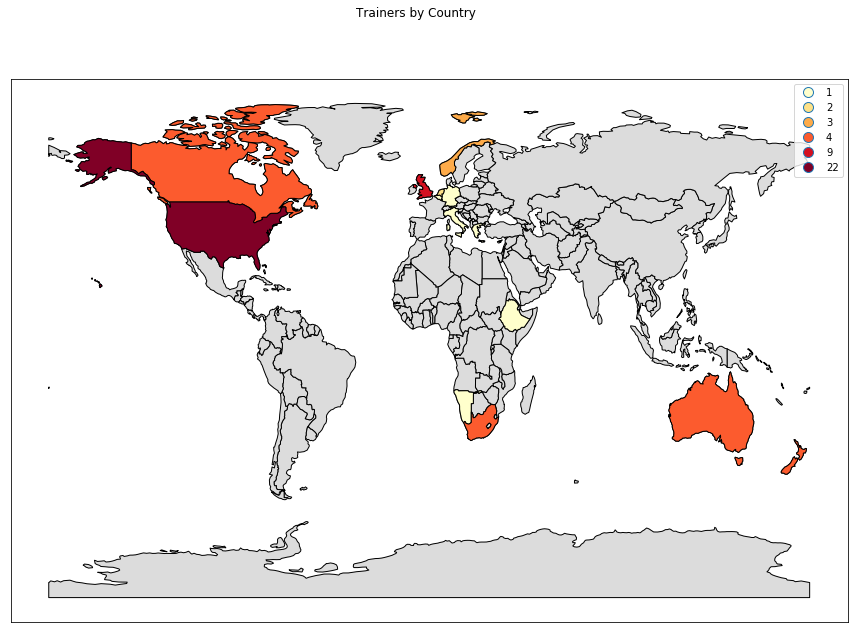

In [81]:
trainers_by_country = trainers.groupby(trainers['name']).id.count().to_frame()

trainers_by_country.reset_index(inplace=True)

trainers_by_country.rename(columns={'id': 'count'}, inplace=True)

trainers_by_country




# Rename column "country" to "name" to be able to merge with geodata
trainers.rename(columns={'country':'name'}, inplace=True)

trainers_map = pd.merge(world, trainers_by_country, on='name', how='left')

# Fill NAs with Zero so map can read
trainers_map.fillna(0, inplace=True)

# Drop the zero values so they are not in the legend or color scale
trainers_map = trainers_map[(trainers_map['count'] != 0)]

# Years as ints, not floats
trainers_map['count'] = trainers_map['count'].astype(int) 

# Drop the zero values so they are not in the legend or color scale
# first_wkshp_map = first_wkshp_map[(first_wkshp_map.year != 0)]

# #  Create map canvas
fig, ax = plt.subplots(figsize=(15,10))

fig.suptitle('Trainers by Country')
# # # Plot basemap all in gray
world.plot(ax=ax, color='#DCDCDC', edgecolor='black')



# # # Overlay plot of countries in color scale
trainers_map.plot(ax=ax, column='count', categorical=True, cmap="YlOrRd", legend=True, edgecolor = 'black',)

# # Drop x & y axis ticks
plt.xticks([], [])
plt.yticks([], [])

# plt.legend()
plt.show()

## Appendix

Table numbering will be fixed for final draft


### Table 1: Workshops by Carpentry by Year
This table shows the number of Data Carpentry (DC) and Software Carpentry (SWC) workshops each year. Data for 2018 is a projection.  The proportion of workshops in the first quarter of 2017 relative to the full year was applied to actual first quarter data from 2018.

In [25]:
workshops_by_carpentry_year_with_projections

Workshop Type,DC,SWC,total
Year,,,
2012,0,38,38
2013,0,93,93
2014,2,137,139
2015,31,243,274
2016,72,272,344
2017,81,256,337
2018,130,294,424


### Table 2: All countries hosting a Carpentries workshop
This table shows the number of Data Carpentry (DC) and Software Carpentry (SWC) workshops in each country each year.  For 2018, only actual data through March is represented, as most countries' data is too small to make meaningful predicitons.

In [26]:
workshops_by_country_year

start_date,2012,2013,2014,2015,2016,2017,2018Q1,total
country,,,,,,,,
Australia,0,6,10,32,41,33,6,128
Belgium,0,0,0,1,0,1,0,2
Botswana,0,0,0,0,0,1,0,1
Brazil,0,0,6,5,5,0,0,16
Canada,8,11,22,25,41,29,4,140
China,0,1,0,0,0,0,0,1
Colombia,0,0,0,0,1,0,0,1
Cyprus,0,0,1,0,0,0,0,1
Denmark,0,0,1,0,2,3,1,7


### Table 3: Countries hosting 10 or more workshops
This table shows the number of Carpentries workshops each year for countries having hosted more than 10 workshops since January 2012. This does not separate out between Data Carpentry and Software Carpentry.  Data for 2018 is a projection.  The proportion of workshops in the first quarter of 2017 relative to the full year was applied to actual first quarter data from 2018.

In [27]:
workshops_by_country_year_top

start_date,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,
United States,20,49,65,140,164,179,244
United Kingdom,7,14,21,27,37,44,53
Switzerland,0,0,2,4,5,2,1
South Africa,0,1,1,5,6,11,22
Norway,1,1,1,4,5,1,1
New Zealand,0,1,0,7,14,9,6
Germany,0,3,3,4,4,9,9
Canada,8,11,22,25,41,29,11
Brazil,0,0,6,5,5,0,0


### Table 4: List of countries that held their first workshop each year

(insert caption here)

In [28]:
first_workshop.set_index('year')

,name
year,
2012,United Kingdom
2012,United States
2012,Canada
2012,Italy
2012,Norway
2012,France
2013,Australia
2013,New Zealand
2013,Poland


### Table 5: Unique countries hosting workshops by year

(insert caption here) 
Need to figure out how to make countries list left justified

In [29]:
unique_countries_by_year

,year,count,countries
0,2012,6,"Canada, France, Italy, Norway, United Kingdom, United States"
1,2013,14,"Australia, Canada, China, France, Germany, Lebanon, Netherlands, New Zealand, Norway, Poland, Saudi Arabia, South Africa, United Kingdom, United States"
2,2014,17,"Australia, Brazil, Canada, Cyprus, Denmark, Germany, Ghana, Italy, Jordan, Norway, Poland, South Africa, Spain, Sweden, Switzerland, United Kingdom, United States"
3,2015,24,"Australia, Belgium, Brazil, Canada, Finland, France, Germany, India, Indonesia, Kenya, Korea, Republic of, Netherlands, New Zealand, Norway, Poland, Slovenia, South Africa, Spain, Sweden, Switzerland, Thailand, United Kingdom, United States, Venezuela, Bolivarian Republic of"
4,2016,24,"Australia, Brazil, Canada, Colombia, Denmark, France, Germany, Greece, Italy, Kenya, Korea, Republic of, Mexico, Netherlands, New Zealand, Norway, Philippines, Poland, Puerto Rico, South Africa, Spain, Sweden, Switzerland, United Kingdom, United States"
5,2017,22,"Australia, Belgium, Botswana, Canada, Denmark, Ethiopia, Gabon, Germany, Ghana, Mauritius, Mexico, Netherlands, New Zealand, Norway, Poland, South Africa, Spain, Sweden, Switzerland, Thailand, United Kingdom, United States"
6,2018,17,"Australia, Canada, Denmark, Ethiopia, France, Germany, Ireland, Italy, Mexico, New Zealand, Norway, South Africa, Sudan, Sweden, Switzerland, United Kingdom, United States"
7,total,43,"Australia, Belgium, Botswana, Brazil, Canada, China, Colombia, Cyprus, Denmark, Ethiopia, Finland, France, Gabon, Germany, Ghana, Greece, India, Indonesia, Ireland, Italy, Jordan, Kenya, Korea, Republic of, Lebanon, Mauritius, Mexico, Netherlands, New Zealand, Norway, Philippines, Poland, Puerto Rico, Saudi Arabia, Slovenia, South Africa, Spain, Sudan, Sweden, Switzerland, Thailand, United Kingdom, United States, Venezuela, Bolivarian Republic of"


### Table 5: Total attendance by Carpentry by year
(insert caption here)

In [30]:
total_attendance_by_year

workshop_type,DC,SWC
year,,
2012,0,1378
2013,0,3212
2014,59,4683
2015,790,6965
2016,1604,5506
2017,1614,5603
2018,397,1338


### Table 6: Carpentries class size
include caption, describing stats

In [31]:
has_attendance.groupby('year').describe().astype(int)

attendance
year                  
2012 count  38        
     mean   36        
     std    12        
     min    7         
     25%    31        
     50%    37        
     75%    40        
     max    79        
2013 count  93        
     mean   34        
     std    18        
     min    8         
     25%    25        
     50%    32        
     75%    39        
     max    133       
2014 count  138       
     mean   34        
     std    18        
     min    6         
     25%    24        
     50%    30        
     75%    39        
     max    130       
2015 count  262       
     mean   29        
     std    13        
     min    1         
     25%    20        
     50%    29        
     75%    38        
     max    75        
2016 count  290       
     mean   24        
     std    11        
     min    1         
     25%    17        
     50%    23        
     75%    30        
     max    78        
2017 count  311       
     mean   23        
     std    10        
     min    1         
     25%    16        
     50%    22        
     75%    29        
     max    71        
2018 count  70        
     mean   24        
     std    11        
     min    6         
     25%    16        
     50%    23        
     75%    31        
     max    67


### Table 7: Full table of all instructor training events

(caption in progress)

This table lists all instructor training events the Carpentries has held since 2012. The "count_badged" column is a total of all individuals from that event with at least one badge.  We are not distinguishing between Software Carpentry and Data Carpentry badges.

For reference, all training events through 2018 Q1 are listed here. However, the analyses below exclude data from 2018 Q1.  Trainees have 90 days to complete their certification requirements, so no one who attended instructor training in 2018 Q1 would be expected to have completed certification.


In [32]:
badges_by_training_event

,slug,start,country,attendance,count_badged,pct_completion
0,2012-08-26-ttt-online,2012-08-26,online,20,17,85.0
1,2012-10-11-ttt-online,2012-10-11,online,25,19,76.0
2,2013-01-06-ttt-online,2013-01-06,online,12,5,41.7
3,2013-03-12-ttt-online,2013-03-12,online,27,18,66.7
4,2013-05-12-ttt-online,2013-05-12,online,45,18,40.0
5,2013-08-12-ttt-online,2013-08-12,online,41,24,58.5
6,2013-09-30-ttt-online,2013-09-30,online,57,22,38.6
7,2014-01-16-ttt-online,2014-01-16,online,67,25,37.3
8,2014-04-14-ttt-pycon,2014-04-14,online,34,3,8.8
9,2014-04-24-ttt-online,2014-04-24,online,58,24,41.4


### Table 8: Instructor Training by Country

Needs caption.  Include note that online is online, even if all trainees were from one country

In [33]:
trainings_by_country

country,Australia,Canada,Netherlands,New Zealand,Norway,Poland,Puerto Rico,South Africa,Switzerland,United Kingdom,United States,online,total
start,,,,,,,,,,,,,
2012,0,0,0,0,0,0,0,0,0,0,0,2,2
2013,0,0,0,0,0,0,0,0,0,0,0,5,5
2014,0,0,0,0,0,0,0,0,0,0,0,10,10
2015,0,1,0,0,0,1,0,0,0,4,3,12,21
2016,2,1,0,3,1,0,0,1,1,3,12,11,35
2017,3,1,1,1,0,0,1,2,0,4,14,21,48


### Table (#): Online and  and inperson events


In [34]:
trainings_online_inperson

,in-person,online
start,,
2012,0,2
2013,0,5
2014,0,10
2015,9,12
2016,24,11
2017,27,21


### Table 8: Instructor Trainers by country and year joined